In [1]:
import numpy as np
import pandas as pd
import re
from tensorflow import keras
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [2]:
#loading data
data = pd.read_csv('uci-news-aggregator.csv',sep = ",",skipinitialspace=True)
#data = ds.sample(n=25000,random_state =42)

In [3]:
data.shape

(422419, 8)

In [4]:
ds = data.sample(frac=1).reset_index(drop=True)
ds.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,274913,Blake Shelton and Miranda Lambert 2014 Divorce...,http://www.classicalite.com/articles/8800/2014...,Classicalite,e,dQJ-vU31UozgxIMLRYZzBbB1k701M,www.classicalite.com,1401901089437
1,28021,Exact Sciences (EXAS) DEEP-C Data Supportive o...,http://www.streetinsider.com/Analyst+Comments/...,StreetInsider.com \(subscription\),m,ddlARaciFtrUZiMK3lVkDuB-Ya8bM,www.streetinsider.com,1395335106628
2,417777,Stocks drift higher; S&P 500 holds at 2000 points,http://www.nwitimes.com/business/stocks-drift-...,nwitimes.com,b,djLhpi133eOrArMoyqZKsUDBkT5xM,www.nwitimes.com,1409161179283
3,359489,Holiday barbecues impacted by Foster Farms chi...,http://abc30.com/food/holiday-barbecues-impact...,KFSN-TV,m,d-4l9hcWA3SaeKMFCbiLIbZkKLg8M,abc30.com,1404539339185
4,334446,Eurozone inflation rate remained flat at low 0...,http://www.greenfieldreporter.com/view/story/d...,Greenfield Daily Reporter,b,dOMwO37KzobwlnMzh-naKdrirlEJM,www.greenfieldreporter.com,1404147679433


<Axes: xlabel='CATEGORY', ylabel='count'>

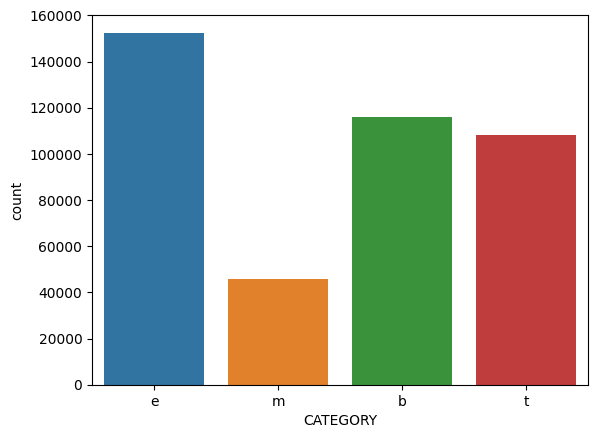

In [5]:
import seaborn as sns
sns.countplot(x = 'CATEGORY',data = ds)

In [6]:
#Removing unwanted features 
data1 = data[['TITLE','CATEGORY']]

In [7]:
data1.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [8]:
#data preprocessing
cleaned = []

for i in range(0,len(data1)):
    
#removing noise and tokenizing

    txt = re.sub('[^a-zA-Z]',' ',data1['TITLE'].iloc[i])
    txt = re.sub(r"[^\w\s]",'',txt.lower())
    txt = txt.split()
    
#stemming

    ps = PorterStemmer()
    txt = [ps.stem(words) for words in txt if not words in set(stopwords.words('english'))]
    txt = [words for words in txt if len(words)>2 and len(words)<20]
    txt = ' '.join(txt)
    
    
    cleaned.append(txt)
    

In [9]:
cleaned[:5]

['fed offici say weak data caus weather slow taper',
 'fed charl plosser see high bar chang pace taper',
 'open stock fall fed offici hint acceler taper',
 'fed risk fall behind curv charl plosser say',
 'fed plosser nasti weather curb job growth']

In [10]:
data1['cleaned']=cleaned

C:\Users\rahee\AppData\Local\Temp\ipykernel_2644\2663930703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cleaned']=cleaned


In [11]:
data1

,TITLE,CATEGORY,cleaned
0,"Fed official says weak data caused by weather,...",b,fed offici say weak data caus weather slow taper
1,Fed's Charles Plosser sees high bar for change...,b,fed charl plosser see high bar chang pace taper
2,US open: Stocks fall after Fed official hints ...,b,open stock fall fed offici hint acceler taper
3,"Fed risks falling 'behind the curve', Charles ...",b,fed risk fall behind curv charl plosser say
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b,fed plosser nasti weather curb job growth
...,...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m,surgeon remov year old rib rebuild damag throat
422415,Boy to have surgery on esophagus after battery...,m,boy surgeri esophagu batteri burn hole throat
422416,Child who swallowed battery to have reconstruc...,m,child swallow batteri reconstruct surgeri cinc...
422417,Phoenix boy undergoes surgery to repair throat...,m,phoenix boy undergo surgeri repair throat dama...


In [12]:
data1.isnull().sum()

TITLE       0
CATEGORY    0
cleaned     0
dtype: int64

In [21]:
#data1.to_csv('cleaned.csv')

In [13]:
#one-hot encoding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
dict_size = 5000
one_hot_mat = [one_hot(words,dict_size) for words in cleaned]
embedded_layer = pad_sequences(one_hot_mat,padding = 'pre',maxlen = 150)
embedded_layer

array([[   0,    0,    0, ..., 4910, 1824,  293],
       [   0,    0,    0, ...,  555,  198,  293],
       [   0,    0,    0, ...,   68, 2828,  293],
       ...,
       [   0,    0,    0, ..., 4766,  507, 3475],
       [   0,    0,    0, ..., 4484, 4140, 1076],
       [   0,    0,    0, ...,  178, 4484, 1102]])

In [14]:
x = embedded_layer
y = np.array(data1['CATEGORY'])

In [15]:
#one-hot encoding
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,4)

In [16]:
category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Original Categorical Values -> Numerical Values:")
for category, encoded_value in category_mapping.items():
    print(f"{category} -> {encoded_value}")

Original Categorical Values -> Numerical Values:
b -> 0
e -> 1
m -> 2
t -> 3


In [17]:
#splitting train test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(337935, 150) (337935, 4)
(84484, 150) (84484, 4)


In [20]:
#model creation

from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(dict_size,50,input_length = len(x[0])))
model.add(Dropout(0.2))
model.add(LSTM(100,))
model.add(Dense(4,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=["accuracy"])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           250000    
                                                                 
 dropout_1 (Dropout)         (None, 150, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               60400     
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 310,804
Trainable params: 310,804
Non-trainable params: 0
_________________________________________________________________


In [22]:
#training
rnn = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 20, batch_size = 256)

Epoch 1/20
1321/1321 [==============================] - 1340s 1s/step - loss: 0.1854 - accuracy: 0.9330 - val_loss: 0.2563 - val_accuracy: 0.9118
Epoch 2/20
1321/1321 [==============================] - 1349s 1s/step - loss: 0.1778 - accuracy: 0.9359 - val_loss: 0.2587 - val_accuracy: 0.9130
Epoch 3/20
1321/1321 [==============================] - 1392s 1s/step - loss: 0.1703 - accuracy: 0.9385 - val_loss: 0.2576 - val_accuracy: 0.9144
Epoch 4/20
1321/1321 [==============================] - 1369s 1s/step - loss: 0.1640 - accuracy: 0.9407 - val_loss: 0.2612 - val_accuracy: 0.9140
Epoch 5/20
1321/1321 [==============================] - 1430s 1s/step - loss: 0.1575 - accuracy: 0.9428 - val_loss: 0.2608 - val_accuracy: 0.9149
Epoch 6/20
1321/1321 [==============================] - 1444s 1s/step - loss: 0.1517 - accuracy: 0.9445 - val_loss: 0.2622 - val_accuracy: 0.9156
Epoch 7/20
1321/1321 [==============================] - 1410s 1s/step - loss: 0.1457 - accuracy: 0.9471 - val_loss: 0.2629 -

In [62]:
model.save('lstm.keras')

In [49]:
joblib.dump(rnn, 'lstm.sav')

['lstm.sav']

In [30]:
#testing
model.evaluate(x_test,y_test)

157/157 [==============================] - 7s 47ms/step - loss: 0.6666 - accuracy: 0.8334


[0.6666099429130554, 0.8334000110626221]

In [23]:
pred = model.predict(x_test)

2641/2641 [==============================] - 62s 23ms/step


In [54]:
y_pred_labels = np.argmax(pred, axis=1)
y_trues_labels = np.argmax(y_test, axis=1)

In [56]:

print("Shape of y_test:", y_trues_labels.shape)
print("Example of y_test:", y_trues_labels[:10]) 

print("Shape of y_pred:", y_pred_labels.shape)
print("Example of y_pred:", y_pred_labels[:10])  


Shape of y_test: (84484,)
Example of y_test: [1 0 1 1 2 1 3 1 0 3]
Shape of y_pred: (84484,)
Example of y_pred: [1 2 1 1 1 1 3 1 0 3]


 Accuracy: 0.9180
 Sensitivity: 0.9096
 Specificity: 0.7863


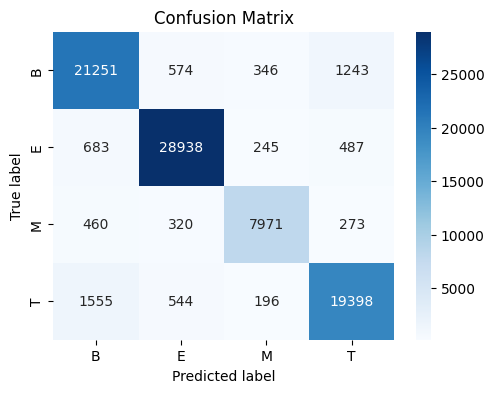

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc




cm = confusion_matrix(y_trues_labels, y_pred_labels)

cm_df = pd.DataFrame(cm,
                     index=['B','E','M','T'], 
                     columns=['B','E','M','T'])


overall_accuracy = np.trace(cm) / np.sum(cm)

sensitivity = np.diag(cm) / cm.sum(axis=1)

specificity = [(np.sum(cm) - cm[i, i]) / (np.sum(cm) - cm[:, i].sum() + cm[i, i]) for i in range(cm.shape[0])]


print(f" Accuracy: {overall_accuracy:.4f}")
print(f" Sensitivity: {np.mean(sensitivity):.4f}")
print(f" Specificity: {np.mean(specificity):.4f}")


plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


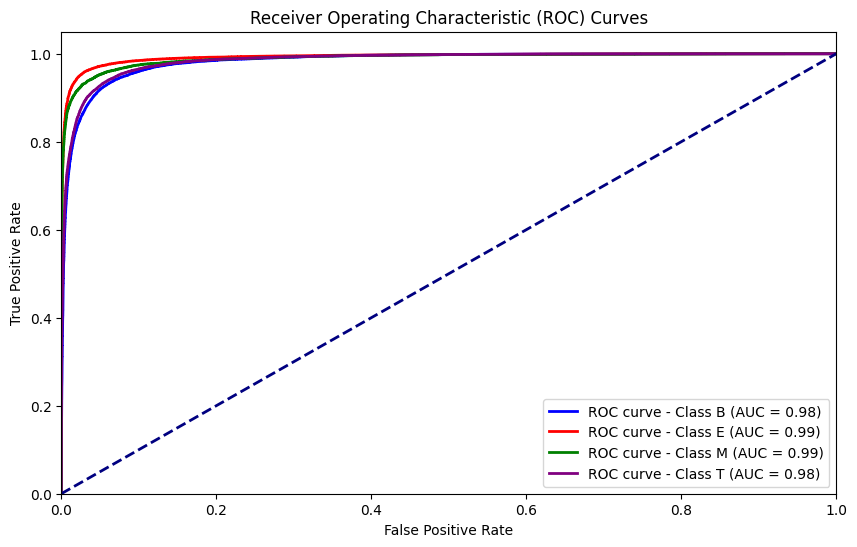

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle


# Calculate ROC curves 
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green', 'purple'])
class_names = ['B', 'E', 'M', 'T']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve - Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [40]:

hidden_layer_model = keras.Model(inputs=model.input, outputs=model.layers[-2].output)
Train_hidden_layer_output = hidden_layer_model.predict(x_train)


625/625 [==============================] - 28s 44ms/step


In [41]:
Test_hidden_layer_output = hidden_layer_model.predict(x_test)


157/157 [==============================] - 7s 44ms/step


In [33]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(Train_hidden_layer_output.shape[1], 1)))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(4, activation='softmax'))
model_cnn.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            256       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 516
Trainable params: 516
Non-trainable params: 0
_________________________________________________________________


In [34]:
cnn_input_train = Train_hidden_layer_output.reshape((-1, Train_hidden_layer_output.shape[1], 1))
cnn_input_test = Test_hidden_layer_output.reshape((-1, Test_hidden_layer_output.shape[1], 1))


In [36]:
history_cnn = model_cnn.fit(cnn_input_train, y_train, validation_data=(cnn_input_test, y_test), epochs=50, batch_size=256)


Epoch 1/50
79/79 [==============================] - 1s 14ms/step - loss: 0.3217 - accuracy: 0.8869 - val_loss: 0.6230 - val_accuracy: 0.7684
Epoch 2/50
79/79 [==============================] - 1s 13ms/step - loss: 0.3025 - accuracy: 0.8952 - val_loss: 0.6235 - val_accuracy: 0.7776
Epoch 3/50
79/79 [==============================] - 1s 14ms/step - loss: 0.2876 - accuracy: 0.9023 - val_loss: 0.6270 - val_accuracy: 0.7852
Epoch 4/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2750 - accuracy: 0.9100 - val_loss: 0.6292 - val_accuracy: 0.7808
Epoch 5/50
79/79 [==============================] - 1s 13ms/step - loss: 0.2650 - accuracy: 0.9119 - val_loss: 0.6341 - val_accuracy: 0.7870
Epoch 6/50
79/79 [==============================] - 1s 14ms/step - loss: 0.2565 - accuracy: 0.9141 - val_loss: 0.6391 - val_accuracy: 0.7878
Epoch 7/50
79/79 [==============================] - 1s 15ms/step - loss: 0.2490 - accuracy: 0.9157 - val_loss: 0.6452 - val_accuracy: 0.7896
Epoch 8/50
79

In [48]:
cnn_hidden_layer_model = keras.Model(inputs=model_cnn.input, outputs=model_cnn.layers[-2].output)
cnn_hidden_layer_output_train = cnn_hidden_layer_model.predict(cnn_input_train)
cnn_hidden_layer_output_test = cnn_hidden_layer_model.predict(cnn_input_test)


157/157 [==============================] - 0s 1ms/step


In [49]:
flattened_cnn_hidden_train = cnn_hidden_layer_output_train.reshape((len(x_train), -1))
flattened_cnn_hidden_test = cnn_hidden_layer_output_test.reshape((len(x_test), -1))


In [50]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')  # You can experiment with different SVM kernels
svm_classifier.fit(flattened_cnn_hidden_train, np.argmax(y_train, axis=1))


SVC(kernel='linear')

In [51]:
svm_score = svm_classifier.score(flattened_cnn_hidden_test, np.argmax(y_test, axis=1))
print(f"SVM Classifier Accuracy: {svm_score}")


SVM Classifier Accuracy: 0.8224


In [39]:
svm_score = svm_classifier.score(cnn_input_test.reshape((len(x_test), -1)), np.argmax(y_test, axis=1))
print(f"SVM Classifier Accuracy: {svm_score}")

SVM Classifier Accuracy: 0.8348


In [35]:
y_train_label=np.argmax(y_train, axis=1)

In [36]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(Train_hidden_layer_output,y_train_label )


SVC(kernel='linear')

In [37]:
y_test_label=np.argmax(y_test, axis=1)

In [38]:
svm_predictions = svm_classifier.predict(Test_hidden_layer_output)


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
svm_accuracy = accuracy_score(y_test_label, svm_predictions)
print("SVM Classifier Accuracy:", svm_accuracy)

SVM Classifier Accuracy: 0.9130604611524076


In [41]:
import joblib
joblib.dump(svm_classifier, 'lstm_svm.sav')

['lstm_svm.sav']

In [23]:
txt = ["Stocks Rise To Kick Off Big Week of Earnings, Fed Decision"]

In [51]:
cleaned = []
for i in range(0,len(txt)):
    msg = re.sub('[^a-zA-Z]',' ',txt[i])
    msg = msg.lower()
    msg = msg.split()
    ps = PorterStemmer()
    msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    cleaned.append(msg)

In [52]:
one_hot_mat = [one_hot(words,dict_size) for words in cleaned]
embedded_layer = pad_sequences(one_hot_mat,padding = 'pre',maxlen = 150)
embedded_layer

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2843,
        1827,  748, 2486,  731, 1146, 

In [53]:
pred = model.predict(embedded_layer)
cat = ['Business','Entertainment','Health','Technology']
print(pred, cat[np.argmax(pred)])

1/1 [==============================] - 0s 37ms/step
[[0.9922659  0.00108239 0.00457906 0.00207271]] Business


In [ ]:
new_model